# Evaluating the data from the numerical solutions and plotting them

Contained within this notebook are all relevant scripts needed to create the figures of the paper, given the data is contained in the numerical_solutions_data

## Files needed for plotting
datasets with:
1. $h=0.1$,$\alpha=\beta=\gamma=1$ both control dependent and independent approaches
2. $h=0.1$,$\alpha=\beta=\gamma=0.5$ both control dependent and independent approaches
3. direct approach solution with $h=0.1$
4. $h=0.01$,$\alpha=\beta=\gamma=0.5$  control independent approach
5. $h=0.1,0.4,0.8$ $\alpha=\beta=\gamma=1$  control independent approach
6. $h=0.1,0.4,0.8$ $\alpha=1,\beta=\gamma=0$  control independent approach

Once these files exist in their supposed locations, then the script will generate the figures without any changes

## Get data and helper functions for plotting

In [1]:
import os
import sys
sys.path.append(os.path.relpath('code' ))
from Analysis_helper_functions import *
base_folder_dir = 'data'
folder_names = os.listdir('data')
dict_of_folders_with_files = dict()
for x in folder_names:
    if x != '.DS_Store':
        dict_of_folders_with_files[x] = create_dict_for_folder(base_folder_dir+'/' +x)


#Structure of data dict:
    # data_dict["folder_name"]=[ {"file_name":data}, [alpha,beta,gamma,h] ]
data_dict = dict()
for x in dict_of_folders_with_files.keys():
    for y in dict_of_folders_with_files[x].keys():
        filename = base_folder_dir+"/"+x + "/"+y
        with open(filename, 'rb') as files:
            data_dict[y] = [pickle.load(files) ,dict_of_folders_with_files[x][y]]

## Fig 1 - Example solution plots

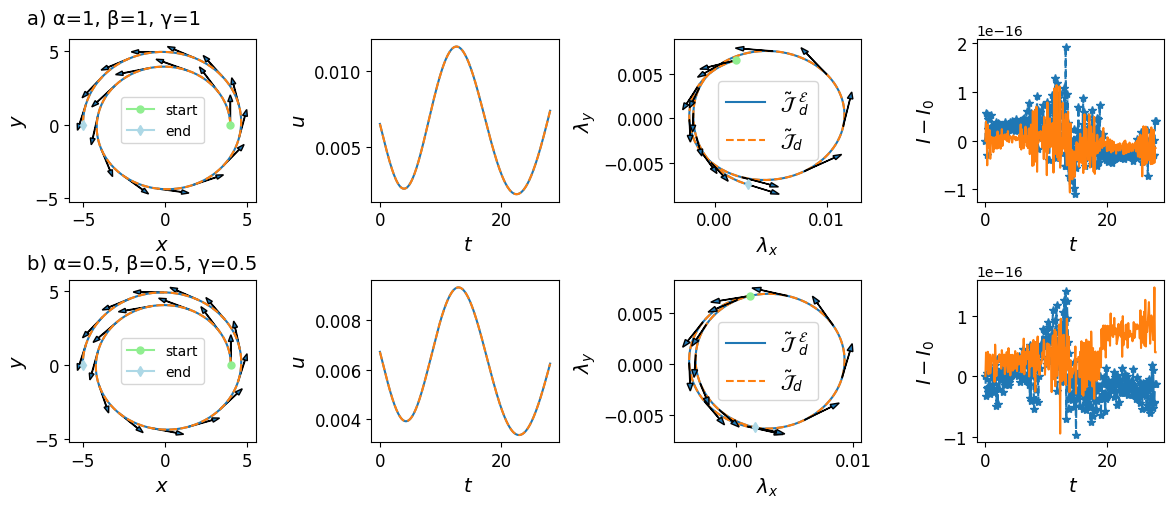

In [3]:
alpha_choice,beta_choice,gamma_choice = 1,1,1
h_choice = 0.1
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
file_name_no_u =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"

alpha_choice2,beta_choice2,gamma_choice2 = 0.5,0.5,0.5
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice2)+"b="+str(beta_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"
file_name_no_u_2 =  "no_u_dep_data_a="+str(alpha_choice2)+"b="+str(beta_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"



loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u,True,True)
loaded_dict_fig1_no_u = data_dict[file_name_no_u][0]
no_u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u,False,True)
properly_calc_u_d = [get_u_from_lambda(x,y,loaded_dict_fig1_u["parameters"]) for (x,y) in zip(loaded_dict_fig1_u["lam_d"],loaded_dict_fig1_u['q_d'])]
velocity_vals = calculate_velocity_paths(loaded_dict_fig1_u)
labelfont = 14
tickfont = 12

fig, axs = plt.subplots(2, 4,figsize=(12,5))

axs[0,0].plot(u_dep_fig1_data[1][0],u_dep_fig1_data[1][1],'-')  
axs[0,0].ticklabel_format(style='sci')
axs[0,0].tick_params(labelsize=tickfont)
axs[0,0].set_xlabel(r'$x$',fontsize=labelfont)
axs[0,0].set_ylabel(r'$y$',fontsize=labelfont)
axs[0,1].plot(u_dep_fig1_data[0], properly_calc_u_d,'-')
axs[0,1].ticklabel_format(style='sci')
axs[0,0].tick_params(labelsize=tickfont)
axs[0,2].plot(np.array(u_dep_fig1_data[2][0]),np.array(u_dep_fig1_data[2][1]),'-',label=r'$\tilde{\mathcal{J}}~{}_d^\mathcal{E}$')   
axs[0,3].plot(u_dep_fig1_data[0],u_dep_fig1_data[5] - u_dep_fig1_data[5][0] ,'--*')
axs[0,0].plot(no_u_dep_fig1_data[1][0],no_u_dep_fig1_data[1][1],'--')    
axs[0,1].plot(no_u_dep_fig1_data[0], [x[0] for x in no_u_dep_fig1_data[3]],'--')
axs[0,1].set_xlabel(" $t$",fontsize=labelfont)
axs[0,1].set_ylabel("$u$",fontsize=labelfont)
axs[0,2].plot(np.array(no_u_dep_fig1_data[2][0]),np.array(no_u_dep_fig1_data[2][1]),'--',label=r"$\tilde{\mathcal{J}}_d$")    
axs[0,2].set_xlabel('$\lambda_x$',fontsize=labelfont)
axs[0,2].set_ylabel('$\lambda_y$',fontsize=labelfont)
axs[0,2].legend(fontsize=labelfont)
axs[0,3].plot(no_u_dep_fig1_data[0],no_u_dep_fig1_data[4]-no_u_dep_fig1_data[4][0],'-')
axs[0,3].set_xlabel(' $t$',fontsize=labelfont)
axs[0,3].set_ylabel('$I-I_0$',fontsize=labelfont)
fig.tight_layout()
fig.text(0.04,0.97,f"a) α={alpha_choice}, β={beta_choice}, γ={gamma_choice}",fontsize=labelfont)



loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_2,True,True)
loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
no_u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_2,False,True)

properly_calc_u_d_2 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_2["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_2["lam_d"],loaded_dict_fig1_u_2['q_d'])]

axs[1,0].plot(u_dep_fig1_data_2[1][0],u_dep_fig1_data_2[1][1],'-')    
axs[1,0].ticklabel_format(style='sci')
axs[1,0].set_xlabel(r'$x$',fontsize=labelfont)
axs[1,0].set_ylabel(r'$y$',fontsize=labelfont)
axs[1,1].plot(u_dep_fig1_data_2[0], properly_calc_u_d_2,'-')
axs[1,1].ticklabel_format(style='sci')
axs[1,2].plot(np.array(u_dep_fig1_data_2[2][0]),np.array(u_dep_fig1_data_2[2][1]),'-',label=r'$\tilde{\mathcal{J}}~{}_d^\mathcal{E}$')    
axs[1,3].plot(u_dep_fig1_data_2[0],u_dep_fig1_data_2[5] - u_dep_fig1_data_2[5][0] ,'--*')
axs[1,0].plot(no_u_dep_fig1_data_2[1][0],no_u_dep_fig1_data_2[1][1],'--')    
axs[1,1].plot(no_u_dep_fig1_data_2[0], [x[0] for x in no_u_dep_fig1_data_2[3]],'--')
axs[1,1].set_xlabel(" $t$",fontsize=labelfont)
axs[1,1].set_ylabel("$u$",fontsize=labelfont)
axs[1,2].plot(np.array(no_u_dep_fig1_data_2[2][0]),np.array(no_u_dep_fig1_data_2[2][1]),'--',label=r"$\tilde{\mathcal{J}}_d$")    
axs[1,2].set_xlabel('$\lambda_x$',fontsize=labelfont)
axs[1,2].set_ylabel('$\lambda_y$',fontsize=labelfont)
axs[1,2].legend(fontsize=labelfont)
axs[1,3].plot(no_u_dep_fig1_data_2[0],no_u_dep_fig1_data_2[4]-no_u_dep_fig1_data_2[4][0],'-')
axs[1,3].set_xlabel(' $t$',fontsize=labelfont)
axs[1,3].set_ylabel('$I-I_0$',fontsize=labelfont)
fig.tight_layout()
fig.text(0.04,0.48,f"b) α={alpha_choice2}, β={beta_choice2}, γ={gamma_choice2}",fontsize=labelfont)
axs[0,0].tick_params(labelsize=tickfont)
axs[0,1].tick_params(labelsize=tickfont)
axs[0,2].tick_params(labelsize=tickfont)
axs[0,3].tick_params(labelsize=tickfont)
axs[1,0].tick_params(labelsize=tickfont)
axs[1,1].tick_params(labelsize=tickfont)
axs[1,2].tick_params(labelsize=tickfont)
axs[1,3].tick_params(labelsize=tickfont)

plot_traj_v = calculate_velocity_paths(loaded_dict_fig1_u)
plot_traj_v2 = calculate_velocity_paths(loaded_dict_fig1_u_2)

plot_curve_with_velocity_arrows(axs[0,0],u_dep_fig1_data[1],plot_traj_v[0],15,{'head_width':0.3,'width':0.031})  
plot_curve_with_velocity_arrows(axs[0,2],u_dep_fig1_data[2],plot_traj_v[1],20,{'head_width':0.0005,'width':0.000031,'zorder':10})  
plot_curve_with_velocity_arrows(axs[1,0],u_dep_fig1_data_2[1],plot_traj_v2[0],15,{'head_width':0.3,'width':0.031})  
plot_curve_with_velocity_arrows(axs[1,2],u_dep_fig1_data_2[2],plot_traj_v2[1],20,{'head_width':0.0005,'width':0.000031,'zorder':10})  

boundarymarkersize=5
axs[0,0].plot([u_dep_fig1_data[1][0][0]],[u_dep_fig1_data[1][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[0,0].plot([u_dep_fig1_data[1][0][-1]],[u_dep_fig1_data[1][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[0,0].legend()

axs[0,2].plot([u_dep_fig1_data[2][0][0]],[u_dep_fig1_data[2][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[0,2].plot([u_dep_fig1_data[2][0][-1]],[u_dep_fig1_data[2][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

axs[1,0].plot([u_dep_fig1_data_2[1][0][0]],[u_dep_fig1_data_2[1][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[1,0].plot([u_dep_fig1_data_2[1][0][-1]],[u_dep_fig1_data_2[1][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[1,0].legend()

axs[1,2].plot([u_dep_fig1_data_2[2][0][0]],[u_dep_fig1_data_2[2][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[1,2].plot([u_dep_fig1_data_2[2][0][-1]],[u_dep_fig1_data_2[2][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

plt.savefig('figures/Examples_fig_1.pdf')


# Fig 2. comparison controls

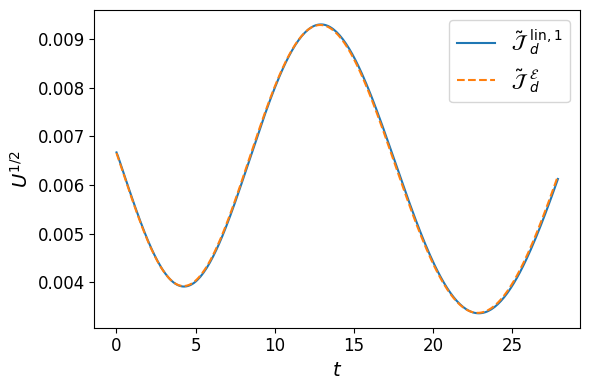

In [6]:
dict_of_folders_with_files_standard = dict()
filename = 'data/standard_comparison_midpoint/standard_comparison_midpoint_h=0.1.pkl'
with open(filename, 'rb') as files:
        dict_of_folders_with_files_standard['h=0.1'] = [pickle.load(files) ]


used_standard_dict = dict_of_folders_with_files_standard['h=0.1'][0]
optimality_conditions = optimality_conditions_generator(vector_field_eval,covector_field_eval,used_standard_dict['parameters'])
total_cost_val_standard01, evo_standard01, control_standard01,time_vals_standard01 = standard_cost_control_plot_data(used_standard_dict)
sol_cost=optimality_conditions.standard_calculate_running_terminal_cost(used_standard_dict['q_d'],used_standard_dict['v_d'],used_standard_dict['U_d'])
total_cost_val_standard01, evo_standard01, control_standard01,time_vals_standard01 = standard_cost_control_plot_data(dict_of_folders_with_files_standard['h=0.1'][0])


h_choice = 0.1
alpha_choice2,beta_choice2,gamma_choice2 = 0.5,0.5,0.5
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice2)+"b="+str(beta_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"
file_name_no_u_2 =  "no_u_dep_data_a="+str(alpha_choice2)+"b="+str(beta_choice2)+"g="+str(gamma_choice2)+"h="+str(h_choice)+".pkl"


loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_2,True,True)
loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
no_u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_2,False,True)


fig, axs = plt.subplots(1, 1,figsize=(6,4))
axs.plot(time_vals_standard01[:-1],control_standard01.flatten()[:-1],label=r"$\tilde{\mathcal{J}} ~{}^{\text{lin},1}_d$")
comparisondata_U = np.array([x[0] for x in u_dep_fig1_data_2[3][:-1]])
axs.plot(u_dep_fig1_data_2[0][:-1], comparisondata_U.flatten(),'--',label=r"$\tilde{\mathcal{J}} ~{}_d^\mathcal{E}$")
axs.set_xlabel('$t$',fontsize=labelfont)
axs.set_ylabel('$U^{1/2}$',fontsize=labelfont)
axs.legend(fontsize=labelfont)
axs.tick_params(labelsize=tickfont)

fig.tight_layout()
plt.savefig('figures/fig2_controlcomparisons.pdf')

# Figure 3 - symplecticity behavior

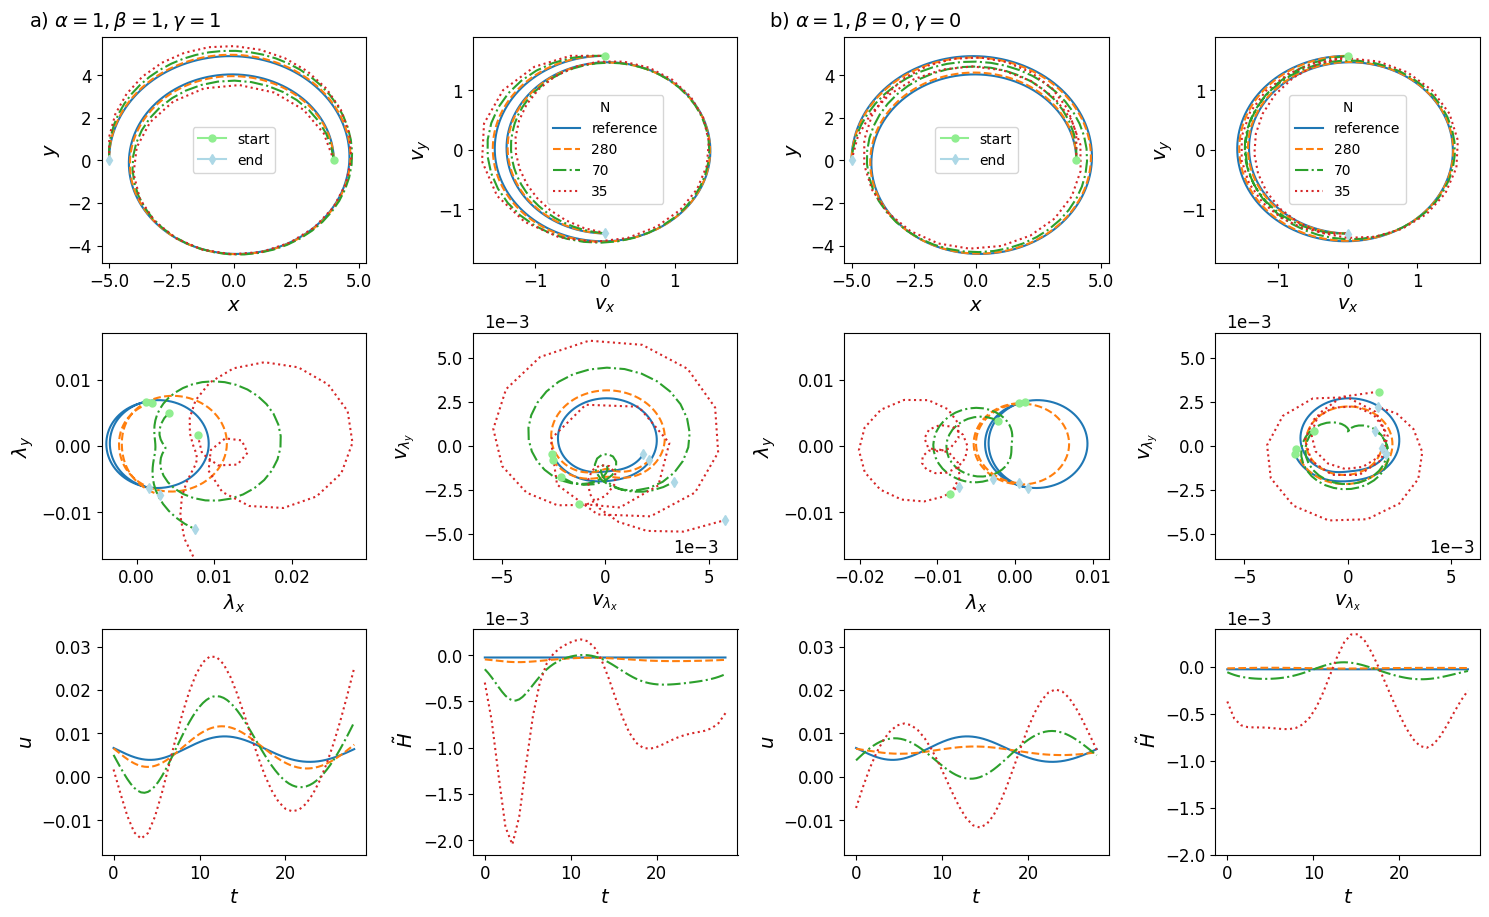

In [7]:
alpha_choice,beta_choice,gamma_choice = 1,1,1

h_choice = 0.1
file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
file_name_no_u =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
h_choice2 = 0.4
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice2)+".pkl"
file_name_no_u_2 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice2)+".pkl"
h_choice3 = 0.8
file_name_u_3 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice3)+".pkl"
file_name_no_u_3 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice3)+".pkl"
h_choice4 = 0.8
file_name_u_4 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice4)+".pkl"
file_name_no_u_4 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice4)+".pkl"



loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u,True,True)
loaded_dict_fig1_no_u = data_dict[file_name_no_u][0]
no_u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u,False,True)
properly_calc_u_d = [get_u_from_lambda(x,y,loaded_dict_fig1_u["parameters"]) for (x,y) in zip(loaded_dict_fig1_u["lam_d"],loaded_dict_fig1_u['q_d'])]

loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_2,True,True)
loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
no_u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_2,False,True)
properly_calc_u_d_2 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_2["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_2["lam_d"],loaded_dict_fig1_u_2['q_d'])]

loaded_dict_fig1_u_3 = data_dict[file_name_u_3][0]
u_dep_fig1_data_3 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_3,True,True)
loaded_dict_fig1_no_u_3 = data_dict[file_name_no_u_3][0]
no_u_dep_fig1_data_3 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_3,False,True)
properly_calc_u_d_3 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_3["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_3["lam_d"],loaded_dict_fig1_u_3['q_d'])]

loaded_dict_fig1_u_4 = data_dict[file_name_u_4][0]
u_dep_fig1_data_4 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_4,True,True)
loaded_dict_fig1_no_u_4 = data_dict[file_name_no_u_4][0]
no_u_dep_fig1_data_4 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_4,False,True)
properly_calc_u_d_4 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_4["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_4["lam_d"],loaded_dict_fig1_u_4['q_d'])]

plot_traj_v = calculate_velocity_paths(loaded_dict_fig1_u)
plot_traj_v2 = calculate_velocity_paths(loaded_dict_fig1_u_2)
plot_traj_v3 = calculate_velocity_paths(loaded_dict_fig1_u_3)
plot_traj_v4 = calculate_velocity_paths(loaded_dict_fig1_u_4)

nvals = [int(loaded_dict_fig1_u_4['parameters']['t_N']/h_choice),int(loaded_dict_fig1_u_4['parameters']['t_N']/h_choice2),int(loaded_dict_fig1_u_4['parameters']['t_N']/h_choice3),int(loaded_dict_fig1_u_4['parameters']['t_N']/h_choice4)]


alpha_choice_reference,beta_choice_reference,gamma_choice_reference = 0.5,0.5,0.5

h_choice_reference = 0.01
file_name_u_reference =  "new_u_dep_data_a="+str(alpha_choice_reference)+"b="+str(beta_choice_reference)+"g="+str(gamma_choice_reference)+"h="+str(h_choice_reference)+".pkl"
file_name_no_u_reference =  "no_u_dep_data_a="+str(alpha_choice_reference)+"b="+str(beta_choice_reference)+"g="+str(gamma_choice_reference)+"h="+str(h_choice_reference)+".pkl"


loaded_dict_fig1_no_u_reference = data_dict[file_name_no_u_reference][0]
no_u_dep_fig1_data_reference = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_reference,False,True)
properly_calc_u_d_reference = [get_u_from_lambda(x,y,loaded_dict_fig1_no_u_reference["parameters"]) for (x,y) in zip(loaded_dict_fig1_no_u_reference["lam_d"],loaded_dict_fig1_no_u_reference['q_d'])]
plot_traj_v_reference = calculate_velocity_paths(loaded_dict_fig1_no_u_reference,False)



fig=plt.figure(figsize=(15, 9))
ax1 = plt.subplot(3,4,1)
ax2 = plt.subplot(3,4,2)
ax3 = plt.subplot(3,4,3)
ax4 = plt.subplot(3,4,4)
ax5 = plt.subplot(3,4,5)
ax6 = plt.subplot(3,4,6)
ax7 = plt.subplot(3,4,7)
ax8 = plt.subplot(3,4,8)
ax9 = plt.subplot(3,4,9)
ax10 = plt.subplot(3,4,10)
ax11 = plt.subplot(3,4,11)
ax12 = plt.subplot(3,4,12)
axs = [ax1,ax2,ax5,ax6,ax3,ax4,ax7,ax8,ax9,ax10,ax11,ax12]



axs[0].plot(no_u_dep_fig1_data_reference[1][0],no_u_dep_fig1_data_reference[1][1],'-',)    
axs[2].plot(np.array(no_u_dep_fig1_data_reference[2][0]),np.array(no_u_dep_fig1_data_reference[2][1]),'-',label='reference')  
  
axs[1].plot(*plot_traj_v_reference[0],'-',label='reference')
axs[3].plot(*(1e3*plot_traj_v_reference[1]),'-')
axs[-4].plot(no_u_dep_fig1_data_reference[0], [x[0] for x in no_u_dep_fig1_data_reference[3]],'-',label='reference')

H_evo_data_reference = create_hamilton_evo(loaded_dict_fig1_no_u_reference,False)
axs[-3].plot(H_evo_data_reference[0],H_evo_data_reference[1]*1e3,'-',label=nvals[0]) 
axs[4].plot(no_u_dep_fig1_data_reference[1][0],no_u_dep_fig1_data_reference[1][1],'-')    
axs[6].plot(np.array(no_u_dep_fig1_data_reference[2][0]),np.array(no_u_dep_fig1_data_reference[2][1]),'-')  
axs[5].plot(*plot_traj_v_reference[0],'-',label='reference')
axs[7].plot(*(1e3*plot_traj_v_reference[1]),'-')
axs[-2].plot(no_u_dep_fig1_data_reference[0], [x[0] for x in no_u_dep_fig1_data_reference[3]],'-',label='reference')
axs[-1].plot(H_evo_data_reference[0],H_evo_data_reference[1]*1e3,'-',label='reference')  

axs[2].plot([no_u_dep_fig1_data_reference[2][0][0]],[no_u_dep_fig1_data_reference[2][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[2].plot([no_u_dep_fig1_data_reference[2][0][-1]],[no_u_dep_fig1_data_reference[2][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[3].plot((1e3*plot_traj_v_reference[1])[0,0],(1e3*plot_traj_v_reference[1])[1,0],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[3].plot((1e3*plot_traj_v_reference[1])[0,-1],(1e3*plot_traj_v_reference[1])[1,-1],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[6].plot(np.array(no_u_dep_fig1_data_reference[2][0])[0],np.array(no_u_dep_fig1_data_reference[2][1])[0],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)  
axs[6].plot(np.array(no_u_dep_fig1_data_reference[2][0])[-1],np.array(no_u_dep_fig1_data_reference[2][1])[-1],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)  
axs[7].plot((1e3*plot_traj_v_reference[1])[0,0],(1e3*plot_traj_v_reference[1])[1,0],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[7].plot((1e3*plot_traj_v_reference[1])[0,-1],(1e3*plot_traj_v_reference[1])[1,-1],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

axs[0].ticklabel_format(style='sci')
axs[0].tick_params(labelsize=tickfont)
axs[0].set_xlabel(r'$x$',fontsize=labelfont)
axs[0].set_ylabel(r'$y$',fontsize=labelfont)
axs[0].tick_params(labelsize=tickfont)
axs[0].plot(no_u_dep_fig1_data[1][0],no_u_dep_fig1_data[1][1],'--')    
axs[2].plot(np.array(no_u_dep_fig1_data[2][0]),np.array(no_u_dep_fig1_data[2][1]),'--')    
axs[2].set_xlabel('$\lambda_x$',fontsize=labelfont)
axs[2].set_ylabel('$\lambda_y$',fontsize=labelfont)

axs[0].plot(no_u_dep_fig1_data_2[1][0],no_u_dep_fig1_data_2[1][1],'-.')    
axs[2].plot(np.array(no_u_dep_fig1_data_2[2][0]),np.array(no_u_dep_fig1_data_2[2][1]),'-.')    
axs[0].plot(no_u_dep_fig1_data_3[1][0],no_u_dep_fig1_data_3[1][1],':')    
axs[2].plot(np.array(no_u_dep_fig1_data_3[2][0]),np.array(no_u_dep_fig1_data_3[2][1]),':')    


axs[1].plot(*plot_traj_v[0],'--',label=nvals[0])
axs[1].plot(*plot_traj_v2[0],'-.',label=nvals[1])
axs[1].plot(*plot_traj_v3[0],':',label=nvals[2])
axs[1].legend(title='N')
axs[1].set_xlabel('$v_x$',fontsize=labelfont)
axs[1].set_ylabel('$v_y$',fontsize=labelfont)
axs[3].plot(*(1e3*plot_traj_v[1]),'--')
axs[3].plot(*(1e3*plot_traj_v2[1]),'-.')
axs[3].plot(*(1e3*plot_traj_v3[1]),':')

axs[3].set_xlim([-6,6])
axs[3].set_ylim([-6,6.1])
axs[3].set_xlabel('$v_{\lambda_x}$',fontsize=labelfont)
axs[3].set_ylabel('$v_{\lambda_y}$',fontsize=labelfont)
axs[0].tick_params(labelsize=tickfont)
axs[1].tick_params(labelsize=tickfont)
axs[2].tick_params(labelsize=tickfont)
axs[3].tick_params(labelsize=tickfont)


axs[-4].tick_params(labelsize=tickfont)
axs[-4].plot(no_u_dep_fig1_data[0], [x[0] for x in no_u_dep_fig1_data[3]],'--',label=f'{nvals[0]}')
axs[-4].plot(no_u_dep_fig1_data_2[0], [x[0] for x in no_u_dep_fig1_data_2[3]],'-.',label=f'{nvals[1]}')
axs[-4].plot(no_u_dep_fig1_data_3[0], [x[0] for x in no_u_dep_fig1_data_3[3]],':',label=f'{nvals[2]}')
axs[-4].set_ylabel('$u$',fontsize=labelfont)
axs[-4].set_xlabel('$t$',fontsize=labelfont)

axs[0].plot([u_dep_fig1_data[1][0][0]],[u_dep_fig1_data[1][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[0].plot([u_dep_fig1_data[1][0][-1]],[u_dep_fig1_data[1][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[0].legend()

axs[1].plot([plot_traj_v[0][0][0]],[plot_traj_v[0][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[1].plot([plot_traj_v[0][0][-1]],[plot_traj_v[0][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = u_dep_fig1_data[2]
axs[2].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[2].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = u_dep_fig1_data_2[2]
axs[2].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[2].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

plot_traj = u_dep_fig1_data_3[2]
axs[2].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[2].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)


plot_traj = plot_traj_v[1]*1e3
axs[3].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[3].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

plot_traj = plot_traj_v2[1]*1e3
axs[3].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[3].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = plot_traj_v3[1]*1e3
axs[3].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[3].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)


H_evo_data = create_hamilton_evo(loaded_dict_fig1_u,True)
axs[-3].plot(H_evo_data[0],H_evo_data[1]*1e3,'--',label=nvals[0])    
H_evo_data = create_hamilton_evo(loaded_dict_fig1_u_2,True)
axs[-3].plot(H_evo_data[0],H_evo_data[1]*1e3,'-.',label=nvals[1])    
H_evo_data = create_hamilton_evo(loaded_dict_fig1_u_3,True)
axs[-3].plot(H_evo_data[0],H_evo_data[1]*1e3,':',label=nvals[2])    


alpha_choice,beta_choice,gamma_choice = 1,0,0

file_name_u =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
file_name_no_u =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice)+".pkl"
file_name_u_2 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice2)+".pkl"
file_name_no_u_2 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice2)+".pkl"
file_name_u_3 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice3)+".pkl"
file_name_no_u_3 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice3)+".pkl"
file_name_u_4 =  "new_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice4)+".pkl"
file_name_no_u_4 =  "no_u_dep_data_a="+str(alpha_choice)+"b="+str(beta_choice)+"g="+str(gamma_choice)+"h="+str(h_choice4)+".pkl"

nvals = [int(28/h_choice),int(28/h_choice2),int(28/h_choice3),int(28/h_choice4)]

loaded_dict_fig1_u = data_dict[file_name_u][0]
u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u,True,True)
loaded_dict_fig1_no_u = data_dict[file_name_no_u][0]
no_u_dep_fig1_data = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u,False,True)
properly_calc_u_d = [get_u_from_lambda(x,y,loaded_dict_fig1_u["parameters"]) for (x,y) in zip(loaded_dict_fig1_u["lam_d"],loaded_dict_fig1_u['q_d'])]

loaded_dict_fig1_u_2 = data_dict[file_name_u_2][0]
u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_2,True,True)
loaded_dict_fig1_no_u_2 = data_dict[file_name_no_u_2][0]
no_u_dep_fig1_data_2 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_2,False,True)
properly_calc_u_d_2 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_2["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_2["lam_d"],loaded_dict_fig1_u_2['q_d'])]

loaded_dict_fig1_u_3 = data_dict[file_name_u_3][0]
u_dep_fig1_data_3 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_3,True,True)
loaded_dict_fig1_no_u_3 = data_dict[file_name_no_u_3][0]
no_u_dep_fig1_data_3 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_3,False,True)
properly_calc_u_d_3 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_3["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_3["lam_d"],loaded_dict_fig1_u_3['q_d'])]

loaded_dict_fig1_u_4 = data_dict[file_name_u_4][0]
u_dep_fig1_data_4 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_u_4,True,True)
loaded_dict_fig1_no_u_4 = data_dict[file_name_no_u_4][0]
no_u_dep_fig1_data_4 = get_fig_1_plot_data_from_dict(loaded_dict_fig1_no_u_4,False,True)
properly_calc_u_d_4 = [get_u_from_lambda(x,y,loaded_dict_fig1_u_4["parameters"]) for (x,y) in zip(loaded_dict_fig1_u_4["lam_d"],loaded_dict_fig1_u_4['q_d'])]

plot_traj_v = calculate_velocity_paths(loaded_dict_fig1_u)
plot_traj_v2 = calculate_velocity_paths(loaded_dict_fig1_u_2)
plot_traj_v3 = calculate_velocity_paths(loaded_dict_fig1_u_3)
plot_traj_v4 = calculate_velocity_paths(loaded_dict_fig1_u_4)


axs[4].ticklabel_format(style='sci')
axs[4].tick_params(labelsize=tickfont)
axs[4].set_xlabel(r'$x$',fontsize=labelfont)
axs[4].set_ylabel(r'$y$',fontsize=labelfont)
axs[4].tick_params(labelsize=tickfont)
axs[4].plot(no_u_dep_fig1_data[1][0],no_u_dep_fig1_data[1][1],'--')    
axs[6].plot(np.array(no_u_dep_fig1_data[2][0]),np.array(no_u_dep_fig1_data[2][1]),'--')    
axs[6].set_xlabel('$\lambda_x$',fontsize=labelfont)
axs[6].set_ylabel('$\lambda_y$',fontsize=labelfont)
fig.tight_layout()

axs[4].plot(no_u_dep_fig1_data_2[1][0],no_u_dep_fig1_data_2[1][1],'-.')    
axs[6].plot(np.array(no_u_dep_fig1_data_2[2][0]),np.array(no_u_dep_fig1_data_2[2][1]),'-.')    
axs[4].plot(no_u_dep_fig1_data_3[1][0],no_u_dep_fig1_data_3[1][1],':')    
axs[6].plot(np.array(no_u_dep_fig1_data_3[2][0]),np.array(no_u_dep_fig1_data_3[2][1]),':')    


axs[5].plot(*plot_traj_v[0],'--',label=nvals[0])
axs[5].plot(*plot_traj_v2[0],'-.',label=nvals[1])
axs[5].plot(*plot_traj_v3[0],':',label=nvals[2])
axs[5].legend(title='N')
axs[5].set_xlabel('$v_x$',fontsize=labelfont)
axs[5].set_ylabel('$v_y$',fontsize=labelfont)
axs[7].plot(*(1e3*plot_traj_v[1]),'--')
axs[7].plot(*(1e3*plot_traj_v2[1]),'-.')
axs[7].plot(*(1e3*plot_traj_v3[1]),':')

axs[7].set_xlabel('$v_{\lambda_x}$',fontsize=labelfont)
axs[7].set_ylabel('$v_{\lambda_y}$',fontsize=labelfont)



axs[4].tick_params(labelsize=tickfont)
axs[5].tick_params(labelsize=tickfont)
axs[6].tick_params(labelsize=tickfont)
axs[7].tick_params(labelsize=tickfont)


axs[-2].tick_params(labelsize=tickfont)
axs[-2].plot(no_u_dep_fig1_data[0], [x[0] for x in no_u_dep_fig1_data[3]],'--',label=f'{nvals[0]}')
axs[-2].plot(no_u_dep_fig1_data_2[0], [x[0] for x in no_u_dep_fig1_data_2[3]],'-.',label=f'{nvals[1]}')
axs[-2].plot(no_u_dep_fig1_data_3[0], [x[0] for x in no_u_dep_fig1_data_3[3]],':',label=f'{nvals[2]}')
axs[-2].set_ylabel('$u$',fontsize=labelfont)
axs[-2].set_xlabel('$t$',fontsize=labelfont)

axs[4].plot([u_dep_fig1_data[1][0][0]],[u_dep_fig1_data[1][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[4].plot([u_dep_fig1_data[1][0][-1]],[u_dep_fig1_data[1][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
axs[4].legend()


axs[5].plot([plot_traj_v[0][0][0]],[plot_traj_v[0][1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[5].plot([plot_traj_v[0][0][-1]],[plot_traj_v[0][1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = u_dep_fig1_data[2]
axs[6].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[6].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = u_dep_fig1_data_2[2]
axs[6].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[6].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

plot_traj = u_dep_fig1_data_3[2]
axs[6].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[6].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

plot_traj = plot_traj_v[1]*1e3
axs[7].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[7].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = plot_traj_v2[1]*1e3
axs[7].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[7].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)
plot_traj = plot_traj_v3[1]*1e3
axs[7].plot([plot_traj[0][0]],[plot_traj[1][0]],marker='o', color='lightgreen',markersize=boundarymarkersize,label='start',zorder=11)
axs[7].plot([plot_traj[0][-1]],[plot_traj[1][-1]],marker='d', color='lightblue',markersize=boundarymarkersize,label='end',zorder=11)

H_evo_data = create_hamilton_evo(loaded_dict_fig1_u,True)
axs[-1].plot(H_evo_data[0],H_evo_data[1]*1e3,'--',label=nvals[0])    
H_evo_data = create_hamilton_evo(loaded_dict_fig1_u_2,True)
axs[-1].plot(H_evo_data[0],H_evo_data[1]*1e3,'-.',label=nvals[1])    
H_evo_data = create_hamilton_evo(loaded_dict_fig1_u_3,True)
axs[-1].plot(H_evo_data[0],H_evo_data[1]*1e3,':',label=nvals[2])    

axs[-1].set_xlabel('$t$',fontsize=labelfont)
axs[-1].set_ylabel(r' $\tilde{H}$',fontsize=labelfont)
axs[-1].tick_params(labelsize=tickfont)
axs[-3].set_xlabel('$t$',fontsize=labelfont)
axs[-3].set_ylabel(r' $\tilde{H}$',fontsize=labelfont)
axs[-3].tick_params(labelsize=tickfont)

fig.text(0.821,0.66,r'1e$-$3 ',fontsize=tickfont)
fig.text(0.956,0.41,r'1e$-$3 ',fontsize=tickfont)
fig.text(0.821,0.33,r'1e$-$3 ',fontsize=tickfont)

fig.text(0.326,0.66,r'1e$-$3 ',fontsize=tickfont)
fig.text(0.326,0.33,r'1e$-$3 ',fontsize=tickfont)
fig.text(0.452,0.41,r'1e$-$3 ',fontsize=tickfont)

fig.text(0.023,0.995,r'a) $\alpha=1,\beta=1,\gamma=1$',fontsize=labelfont)
fig.text(0.516,0.995,r'b) $\alpha=1,\beta=0,\gamma=0$',fontsize=labelfont)
q_aspect = 5.3
q_shift = 0.5
axs[0].set_xlim([-q_aspect,q_aspect])
axs[0].set_ylim([-q_aspect+q_shift,q_aspect+q_shift])
axs[4].set_ylim([-q_aspect+q_shift,q_aspect+q_shift])
axs[4].set_xlim([-q_aspect,q_aspect])
vs_aspect = 1.9
axs[1].set_xlim([-vs_aspect,vs_aspect])
axs[1].set_ylim([-vs_aspect,vs_aspect])
axs[5].set_xlim([-vs_aspect,vs_aspect])
axs[5].set_ylim([-vs_aspect,vs_aspect])
lambda_aspect = 0.017
offsetlam_x = 0.0125
offsetlam_x2 = -0.005

axs[2].set_xlim([-lambda_aspect+offsetlam_x,lambda_aspect+offsetlam_x])
axs[2].set_ylim([-lambda_aspect,lambda_aspect])
axs[6].set_xlim([-lambda_aspect+offsetlam_x2,lambda_aspect+offsetlam_x2])
axs[6].set_ylim([-lambda_aspect,lambda_aspect])

vlam_scale = 6.4
axs[3].set_xlim([-vlam_scale,vlam_scale])
axs[3].set_ylim([-vlam_scale,vlam_scale])
axs[7].set_xlim([-vlam_scale,vlam_scale])
axs[7].set_ylim([-vlam_scale,vlam_scale])


control_up=0.034
control_low=-0.018

axs[-4].set_ylim([control_low,control_up])
axs[-2].set_ylim([control_low,control_up])
H_up = 0.4
H_down = -2
axs[-1].set_ylim([H_down,H_up])
fig.tight_layout()
plt.savefig('figures/fig3_alternate_all.pdf',bbox_inches='tight')